# Predicting Iowa House Sales Price (Capstone - I)

In [23]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#import test train data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#defining a columns test in test train to track which rows are test and train
train['test'] = 0
test['test'] = 1


#creating a unified df for test train
df = pd.concat([train, test], axis=0,ignore_index=True )

#df.reset_index(drop=True)
pd.set_option('display.max_columns', None)
df.shape

#### Replacing spaces from column names in df

In [ ]:
df.columns = df.columns.str.replace(" ","_")

# A. Imputing Missing Values 

In [ ]:
df.head()

In [ ]:
#checking columns with null values
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

Missing values for 'FireplaceQu','PoolQC','Fence','MiscFeature' means these features are not present in the data. (Source: data description)

#### PoolQC

In [ ]:
df[(df['PoolArea'] > 0) & (df['PoolQC'].isnull())]

In [ ]:
df['PoolQC'][(df['PoolArea'] > 0) & (df['PoolQC'].isnull())] = df['PoolQC'].mode()[0]

In [ ]:
df['PoolQC'] = df['PoolQC'].fillna('None')

#### MiscFeature     

In [ ]:
df[(df['MiscVal'] > 0) & (df['MiscFeature'].isnull())]

In [ ]:
sns.distplot(df['MiscVal'][df['MiscVal']>0])

In [ ]:
df['MiscFeature'][(df['MiscVal'] > 0) & (df['MiscFeature'].isnull())] = df['MiscFeature'].fillna(df['MiscFeature'].mode()[0])

In [ ]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

#### Alley, Fence

In [ ]:
df[['Fence','Alley']] = df[['Fence','Alley']].fillna('None')

#### FireplaceQu

In [ ]:
df[(df['Fireplaces'] > 0) & (df['FireplaceQu'].isnull())]

In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

#### Garage variables

In [ ]:
df[(df['GarageArea'] > 0) & (df['GarageYrBlt'].isnull())]

In [ ]:
df['GarageYrBlt'][(df['GarageArea'] > 0) & (df['GarageYrBlt'].isnull())] = df['YearBuilt'][(df['GarageArea'] > 0) & (df['GarageYrBlt'].isnull())]

In [ ]:
df[['GarageCars','GarageCond']][df['GarageYrBlt'].isnull()].sum()

In [ ]:
df[['GarageCars','GarageCond']][df['GarageYrBlt'].isnull()].sum()

In [ ]:
df[['GarageFinish','GarageQual','GarageType' ]][df['GarageYrBlt'].isnull()].sum()

In [ ]:
df[(df['GarageType'].notnull()) & (df['GarageYrBlt'].isnull())]

In [ ]:
df[(df['GarageType'].notnull()) & (df['GarageFinish'].isnull())]

In [ ]:
df['GarageCond'][df['GarageYrBlt']<1960].mode()

In [ ]:
df.loc[2126,'GarageCond'] = df['GarageCond'][df['GarageYrBlt']<1960].mode()[0]

In [ ]:
df.loc[2126,'GarageFinish'] = df['GarageFinish'][df['GarageYrBlt']<1960].mode()[0]

In [ ]:
df.loc[2126,'GarageQual'] = df['GarageQual'][df['GarageYrBlt']<1960].mode()[0]

Checking for GarageType not null but GarageQual is null

In [ ]:
df[df['GarageQual'].isnull() & df['GarageType'].notnull()]

In [ ]:
df['GarageType'][df['GarageQual'].isnull() & df['GarageType'].notnull()] = np.nan

GarageArea not null but  GarageCond is null

In [ ]:
df[df['GarageArea'].isnull()]

In [ ]:
df[['GarageArea','GarageCars']][df['GarageQual'].isnull()].sum()

#### Now we can replace all remaining missing garage variables with either 0 or None

In [ ]:
df[(df['GarageCars'] ==0) & df['GarageYrBlt'].notnull()].head()

In [ ]:
df.head()

In [ ]:
df[['GarageArea','GarageCars']] = df[['GarageArea','GarageCars']].fillna(0)

In [ ]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [ ]:
df[df['GarageYrBlt'] == df['GarageYrBlt'].max()]

In [ ]:
df['GarageYrBlt'][df['GarageYrBlt'] == df['GarageYrBlt'].max()] = df['YearBuilt'][df['GarageYrBlt'] == df['GarageYrBlt'].max()]

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

#### LotFrontage

Replacing LotFrontage with the mean of the neighbourhood, as each neighborhood is likely to have similar LotFrontage

In [ ]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

##### MasVnrArea, MasVnrType

MasVnrArea NaN means there is no masonry done and should be None
If MasVnrArea = 0, then MasVnrType is None, so we will impute the missing values for these 2 variables as zero and None

In [ ]:
#replacing NaN with None
df['MasVnrArea'][df['MasVnrArea'].isnull()] = 0
df['MasVnrType'][(df['MasVnrType'].isnull()) | (df['MasVnrType'] == None)] = 'None'

In [ ]:
# df.isnull().sum()[df.isnull().sum()>0]

##### Basement columns
From documentation we know that NA for BsmtCond and BsmtExposure means 'No Basement'

In [ ]:
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF']

In [ ]:
temp = df[basement_columns][df[basement_columns].isnull().any(axis=1)]

In [ ]:
temp[temp.isnull().sum(axis=1) < 5]

In [ ]:
df.loc[332, 'BsmtFinType2'] = 'ALQ' #since smaller than SF1
df.loc[948, 'BsmtExposure'] = 'No' 
df.loc[1487, 'BsmtExposure'] = 'No'
df.loc[2040, 'BsmtCond'] = 'TA'
df.loc[2185, 'BsmtCond'] = 'TA'
df.loc[2217, 'BsmtQual'] = 'Po' #v small basement so let's do Poor.
df.loc[2218, 'BsmtQual'] = 'Fa' #similar but a bit bigger.
df.loc[2348, 'BsmtExposure'] = 'No' #unfinished bsmt so prob not.
df.loc[2524, 'BsmtCond'] = 'Gd' #cause ALQ for bsmtfintype1

In [ ]:
df[['BsmtCond','BsmtExposure']] = df[['BsmtCond','BsmtExposure']].fillna('None')

##### 

In [ ]:
df['MSZoning'].value_counts()

In [ ]:
df[df['Utilities'].isnull()]

##### BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF. TotalBsmtSF

BsmtFinSF1 and BsmtFinSF2 are missing, mostly implying that there is no basement and hence 0. Same holds true for BsmtFinType1 BsmtFinType2. BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, TotalBsmtSF

In [ ]:
df[['BsmtFinSF1','BsmtFinSF2']] = df[['BsmtFinSF1','BsmtFinSF2']].fillna(0)

In [ ]:
df[['BsmtFinType1','BsmtFinType2']] = df[['BsmtFinType1','BsmtFinType2']].fillna('None')

In [ ]:
df[['BsmtFullBath','BsmtHalfBath']] = df[['BsmtFullBath','BsmtHalfBath']].fillna(0)

In [ ]:
df[['BsmtQual']] = df[['BsmtQual']].fillna('None')

In [ ]:
df[['BsmtUnfSF', 'TotalBsmtSF']] = df[['BsmtUnfSF', 'TotalBsmtSF']].fillna(0)

##### Electrical
Let's replace electrical with most frequent electrical value

In [ ]:
df[['Electrical']] = df[['Electrical']].fillna(df['Electrical'].mode()[0])

##### Exterior1st, Exterior2nd
For Exterior1st and Exterior2nd, let's impute with mode as the house needs to have exterior covering

In [ ]:
df[['Exterior1st']] = df[['Exterior1st']].fillna(df['Exterior1st'].mode()[0])
df[['Exterior2nd']] = df[['Exterior2nd']].fillna(df['Exterior2nd'].mode()[0])

##### Functional
For Functional again let's take the mode which typical functionality

In [ ]:
df[['Functional']] = df[['Functional']].fillna(df['Functional'].mode()[0])

##### KitchenQual, MSZoning, SaleType

For KitchenQual, SaleType, MSZoning let's take the mode

In [ ]:
df[['KitchenQual']] = df[['KitchenQual']].fillna(df['KitchenQual'].mode()[0])
df[['SaleType']] = df[['SaleType']].fillna(df['SaleType'].mode()[0])
df[['MSZoning']] = df[['MSZoning']].fillna(df['MSZoning'].mode()[0])

##### Utilities

For Utilities, all but 1 house is AllPub, so we will alter the one which is not AllPub or the ones with missing data as AllPub

In [ ]:
df['Utilities'][df['Utilities'].isnull() | (df['Utilities'] != df['Utilities'].mode()[0])] = df['Utilities'].mode()[0]

##### Functional

Replacing with mode

In [ ]:
df[['Functional']] = df[['Functional']].fillna(df['Functional'].mode()[0])

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

##### We should not have any missing values now except for SalePrice
We will now break the df into train and test again

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

In [ ]:
train = df[df['test'] ==0]
test = df[df['test'] ==1]

In [ ]:
# test.shape, train.shape

In [ ]:
test = test.drop(['SalePrice', 'test'], axis =1)
train = train.drop(['test'], axis =1)

### Exporting imputed test train data

In [ ]:
test.to_csv('imputed_test.csv',index=False )
train.to_csv('imputed_train.csv', index=False)

# B. Seperating data into cat, num cols

Reading imputed data

In [ ]:
#Reading imputed dataset
train = pd.read_csv('imputed_train.csv') 
test = pd.read_csv('imputed_test.csv')

train['test'] = 0
test['test'] = 1

df = pd.concat([train, test], axis=0, ignore_index=True)

In [ ]:
# df.isnull().sum()

### Seperating columns into num_cols, cat_cols, target

In [ ]:
# df.dtypes

In [ ]:
#defining cat/num cols
df['MSSubClass'] = df['MSSubClass'].astype('category')
cat_cols  = list(df.dtypes[df.dtypes == 'object'].index) + list(df.dtypes[df.dtypes == 'category'].index)
num_cols = list(set(df.columns)  - set(cat_cols))
target = 'SalePrice'
num_cols.remove('SalePrice')
num_cols.remove('Id')
num_cols.remove('test')
#num_cols

In [ ]:
df[cat_cols].head()

**MSSubClass** is misclassified as numerical variable, we need to mention it as a categorical variable (did it in the above cell)

# C. Feature Engineering

There are some features that can be generated from the data

Lets add new features based on kaggle discussion

- **age_when_sold** : df['YrSold'] - df['YearBuilt']
- **remodel_age** = YrSold - YearRemodAdd
- **totalSF** : GrLivArea + TotalBsmtSF
- **no_of_bath** =  BsmtFullBath + 0.5*(BsmtHalfBath) + FullBath + 0.5*(HalfBath)
- **total_porch** = OpenPorchSF + EnclosedPorch + ScreenPorch + 3SsnPorch + WoodDeckSF
- **overall_qual_cond** = OverallCond * OverallQual
- **non_bedroom_rooms** = TotRmsAbvGrd - BedroomAbvGr #might suggest reading room, activities room, etc, boosting the price


In [ ]:
df['age_when_sold'] = df['YrSold'] - df['YearBuilt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']
df['totalSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']
df['no_of_bath'] = df['BsmtFullBath'] + df['FullBath'] + 0.5*df['BsmtHalfBath'] + 0.5*df['HalfBath']
df['total_porch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['3SsnPorch'] + df['WoodDeckSF']

df['overall_qual_cond'] = df['OverallCond'] *  df['OverallQual']

df['non_bedroom_rooms'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

##### Exterior1st, Exterior2nd

If there are 2 covering on the exterior, this may boost the price. A new feature can be created stating number of exterior coverings

In [ ]:
def condition(df):
    if df['Exterior1st'] != df['Exterior2nd']:
        return(2)
    else:
        return(1)

In [ ]:
df['num_ext_coverings'] = df.apply(condition, axis=1)

In [ ]:
df.head()

### BsmtQual BsmtCond

These two variables are categorical currently, but can be made ordinal as they have oridinality One made numerical (ordinal), we can multiply them to create bsmt_qual_cond


In [ ]:
temp = {'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['BsmtQual'] = df['BsmtQual'].map(temp)
df['BsmtCond'] = df['BsmtCond'].map(temp)
df['bsmt_qual_cond'] = df['BsmtQual'] * df['BsmtCond']

##### ExterQual ExterCond

Similarly, ExterQual ExterCond can be made ordinal, and from these bsmt_qual_cond can be derived

In [ ]:
temp = {'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['ExterQual'] = df['ExterQual'].map(temp)
df['ExterCond'] = df['ExterCond'].map(temp)
df['extr_qual_cond'] = df['ExterQual'] * df['ExterCond']

###  BsmtExposure

This can also be made ordinal

In [ ]:
temp = {'None':0,'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
df['BsmtExposure'] = df['BsmtExposure'].map(temp)

### BsmtFinType1  BsmtFinType2

These can be made ordinal as well

In [ ]:
temp = {'None':0,'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
df['BsmtFinType1'] = df['BsmtFinType1'].map(temp)
df['BsmtFinType2'] = df['BsmtFinType2'].map(temp)

### BsmtUnfSF TotalBsmtSF

Ratio of the above variables can tell us how much % of the basement is finished. Houses with finished basement should command higher prices

In [ ]:
def bsmt_percent_finished_condition(df):
    if df['TotalBsmtSF']==0:
        return 0
    else:
        return(100*(1 - df['BsmtUnfSF']/df['TotalBsmtSF']))

In [ ]:
df['bsmt_percent_finished'] = df.apply(bsmt_percent_finished_condition, axis=1)

In [ ]:
df[df['bsmt_percent_finished'].isnull()].head()

### HeatingQC

This can be made ordinal as well

In [ ]:
temp = {'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['HeatingQC'] = df['HeatingQC'].map(temp)

### CentralAir

This is a Yes/No, and ce|ntral cooling can be an important factor given Iowa has summers. We should convert it from Yes/No to 1/0

In [ ]:
temp = {'N':0, 'Y':1}
df['CentralAir'] = df['CentralAir'].map(temp)

### LowQualFinSF

1 - (% of LowQualFinSF / totalSF) wil give us % of finishedSF that is NOT LowQual i.e. is high qual 

In [ ]:
#df[df['LowQualFinSF'] > 0].head()
df['HighQualFinSF_percent'] = 100 * (1 - df['LowQualFinSF']/df['totalSF'])

### BedroomAbvGr FullBath HalfBath

The above three variables can be combined to to find the ration of bathrooms to bedroom. Having a bathroom for each bedtroom can be a really important consideration for many

In [ ]:
def bath_bed_condition(df):
    if df['BedroomAbvGr']!=0:
        return((df['FullBath'] + 0.5*df['HalfBath'])/df['BedroomAbvGr'])
    else:
        return 0

In [ ]:
df['bath_bed_ratio'] = df.apply(bath_bed_condition, axis=1)

### KitchenQual 

This can be made ordinal again

In [ ]:
temp = {'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['KitchenQual'] = df['KitchenQual'].map(temp)

### FireplaceQu

This can again be made ordinal

In [ ]:
temp = {'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['FireplaceQu'] = df['FireplaceQu'].map(temp)

### GarageFinish

Can be made ordinal

In [ ]:
temp = {'None':0,'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
df['GarageFinish'] = df['GarageFinish'].map(temp)

### GarageQual GarageCond

Can be made ordinal and garage_qual_cond can be derived

In [ ]:
temp = {'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['GarageQual'] = df['GarageQual'].map(temp)
df['GarageCond'] = df['GarageCond'].map(temp)
df['extr_qual_cond'] = df['GarageQual'] * df['GarageCond']

### PoolQC

can be made ordinal

In [ ]:
temp = {'None':0,'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
df['PoolQC'] = df['PoolQC'].map(temp)

In [ ]:
df.head()

### Some more features beign derived

In [ ]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df[df['age_when_sold'] < 0]

In [ ]:
df['YrSold'][df['age_when_sold'] < 0] = 2009
df['age_when_sold'][df['age_when_sold'] < 0] = 1

In [ ]:
df[df['remodel_age'] < 0]

In [ ]:
df.loc[2293,'YrSold'] = 2009

In [ ]:
df['remodel_age'][df['remodel_age'] < 0] = 0

#### let's drop year month columns

In [ ]:
df = df.drop(['GarageYrBlt'], axis=1)

In [ ]:
df = df.drop(['YearBuilt','YearRemodAdd','YrSold','MoSold', 'GarageYrBlt'], axis=1)

### Outlier removal

In [ ]:
df = df.drop(df[(df['totalSF'] > 5200)& (df['SalePrice'] < 300000)].index, axis=0)

In [ ]:
df[(df['totalSF'] > 5200)& (df['SalePrice'] < 300000)]

In [ ]:
train = df[df['test']==0]
test = df[df['test']==1]

In [ ]:
#exporting df
df.to_csv('df_with_features.csv',index=False)

# D. Univariate Analysis

In [ ]:
df = pd.read_csv('df_with_features.csv')
df.head()

In [ ]:
df['MSSubClass'] = df['MSSubClass'].astype('category')
cat_cols  = list(df.dtypes[df.dtypes == 'object'].index) + list(df.dtypes[df.dtypes == 'category'].index)
num_cols = list(set(df.columns)  - set(cat_cols))

target = 'SalePrice'
num_cols.remove('SalePrice')
num_cols.remove('Id')
num_cols.remove('test')

num_cols = sorted(num_cols)
cat_cols = sorted(cat_cols)

#within num cols, we will define cotinuos and discrete features
dis_cols = """BedroomAbvGr
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
CentralAir
ExterCond
ExterQual
FireplaceQu
Fireplaces
FullBath
GarageCars
GarageCond
GarageFinish
GarageQual
GarageYrBlt
HalfBath
HeatingQC
KitchenAbvGr
KitchenQual
MoSold
OverallCond
OverallQual
PoolQC
TotRmsAbvGrd
YearBuilt
YearRemodAdd
YrSold
bsmt_qual_cond
age_when_sold
extr_qual_cond
no_of_bath
non_bedroom_rooms
num_ext_coverings
overall_qual_cond
remodel_age
haspool
has2ndfloor
hasgarage
hasbsmt
hasfireplace"""

dis_cols = dis_cols.split('\n')

In [ ]:
# cont_cols = list(set(num_cols) - set(dis_cols))

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

In [ ]:
#selecting train and test
train = df[df['test']==0]
test = df[df['test']==1]

In [ ]:
for i in range(0,len(num_cols),5):
    sns.pairplot(x_vars=num_cols[i:i+5], y_vars='SalePrice', data=train)

##### SalePrice (target)

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.style as style
from scipy import stats
style.use('default')

In [ ]:
def chart(feature, df):
    fig = plt.figure(figsize = (6,4), constrained_layout=True)
    grid = gridspec.GridSpec(nrows=2, ncols=3, figure=fig)

 
    
    #Hist
    ax1= fig.add_subplot(grid[0,:2])
    #ax1.set_title("Histogram")
    sns.distplot(df[feature], ax=ax1,norm_hist=True)
    
    ax2=fig.add_subplot(grid[1,:2])
    #ax2.set_title('QQ PLot')
    stats.probplot(df[feature], plot = ax2)
    
    
    ax3 = fig.add_subplot(grid[0:2:,2])
    #ax3.set_title('Boxplot')
    sns.boxplot(df[feature], ax=ax3, orient='v')
    
#     fig.spines['top'].set_visible(False)
#     fig.spines['right'].set_visible(False)
#     fig.spines['bottom'].set_visible(False)
#     fig.spines['left'].set_visible(False)
    
    #plt.box(on=None)
    
    #sns.despine(left=True, bottom=True, right=True)
    
    fig.suptitle(feature)
    
    #plt.tight_layout()
    
    

In [ ]:
chart('SalePrice', df=train)

The target variable is a little right skewed. We will apply log transformation

In [ ]:
train['LogSalePrice'] = np.log(1 + train['SalePrice'])

In [ ]:
chart('LogSalePrice', df=train)

target variable is more normal now

### Removing skewness from continuous variables

In [ ]:
(df[num_cols] >= 0).all(0)[(df[num_cols] >= 0).all(0) == False]

In [ ]:
from scipy.stats import skew
df[num_cols].apply(lambda x: abs(skew(x))).sort_values(ascending =False)

skewnwss outside of [-1,1] is highly skewed. We will apply Boxcox transformation to remove the skewness

plotting skewed features before transformation

In [ ]:
skewed_features = df[num_cols].apply(lambda x: abs(skew(x))).sort_values(ascending =False)[df[num_cols].apply(lambda x: abs(skew(x))).sort_values(ascending =False) >.5].index
for i in skewed_features:
    chart(i, df)

plt.tight_layout()        

##### Removing skewness by apply BOxcox transformation

In [ ]:
from scipy import stats
from scipy.special import boxcox1p

In [ ]:
for i in skewed_features:
    df[i] = boxcox1p(df[i], stats.boxcox_normmax(df[i] + 1))

In [ ]:
#skewed_features = df[cont_cols].apply(lambda x: abs(skew(x))).sort_values(ascending =False)[df[cont_cols].apply(lambda x: abs(skew(x))).sort_values(ascending =False) >1].index
for i in skewed_features:
    chart(i, df)

plt.tight_layout() 

In [ ]:
df.head()

# C. Removing features that are not very important

### Checking skewness of continuous variables 

In [ ]:
df[num_cols].apply(lambda x: abs(skew(x))).sort_values(ascending =False)

Still there are var having skewness >1, we will remove these variables

In [ ]:
# var_to_remove = df[num_cols].apply(lambda x: abs(skew(x)))[df[num_cols].apply(lambda x: abs(skew(x))) > 1].index

In [ ]:
# num_cols = list(set(num_cols) - set(var_to_remove))

### Calculating VIF for num cols

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["features"] = df[num_cols].columns
vif["vif factor"] = [variance_inflation_factor(df[num_cols].values, i) for i in range(df[num_cols].shape[1])]

In [ ]:
vif =  vif.sort_values(by='vif factor', ascending=False)
vif = vif[sorted(vif.columns)]

In [ ]:
vif

only colymn HighQualFinSF_percent has a vif > 4, we are already removing this column

In [ ]:
num_cols.remove('HighQualFinSF_percent')

In [ ]:
df = df.drop('HighQualFinSF_percent',axis =1)

In [ ]:
len(cat_cols)

In [ ]:
fig, ax = plt.subplots(len(cat_cols)//3 + 1,3, figsize=(20,20))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols):
        sns.countplot(df[cat_cols[i]], ax=ax)
        ax.tick_params(labelrotation=45)
plt.tight_layout()    

**BldgType, HouseStyle, LotConfig, Neighborhood, GarageType, Fence, Exterior1st, MSSubClass** seem to be the most important variables
We will start with these cat variables

#### Neighborhood

In [ ]:
#temp = df['Neighborhood'].value_counts().sort_values(ascending=False)
temp = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
temp

In [ ]:
d = temp.to_dict()
d

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>300000):
        d[k] = 'A'
    elif (v>200000):
        d[k] = 'B'
    elif (v>150000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
d

In [ ]:
df['Neighborhood_Category'] = df['Neighborhood'].map(d)

In [ ]:
# train = df[df['test'] == 0]
# test = df[df['test'] == 1]
df.head()

### HouseStyle

In [ ]:
temp = df.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=False)
temp

HouseStyle has relevant categor
ies for 1Story    2Story      1.5Fin     and rest can be clubbed as others

In [ ]:
d = temp.to_dict()

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    else:
        d[k] = 'C'

In [ ]:
df['HouseStyle_Category'] = df['HouseStyle'].map(d)

### GarageType

In [ ]:
temp = df.groupby('GarageType')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    else:
        d[k] = 'C'

In [ ]:
df['GarageType_Category'] = df['GarageType'].map(d)

GarageFinish has manageable numner of categories, we will leave it as it is

## Exterior1st

In [ ]:
temp = df.groupby('Exterior1st')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
df['Exterior1st_Category'] = df['Exterior1st'].map(d)

### BldgType

In [ ]:
temp = df.groupby('BldgType')['SalePrice'].median().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>180000):
        d[k] = 'A'
    elif (v>130000):
        d[k] = 'B'
    elif (v>180000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
sns.catplot(x='BldgType', y='SalePrice', data=train, kind='boxen')

In [ ]:
sns.catplot(x='HouseStyle', y='SalePrice', data=train, kind='boxen')

### LotConfig

In [ ]:
temp = df.groupby('LotConfig')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
temp = df.groupby('LotConfig')['SalePrice'].median().sort_values(ascending=False)
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>210000):
        d[k] = 'A'
    elif (v>200000):
        d[k] = 'B'
    elif (v>180000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
df['LotConfig_Category'] = df['LotConfig'].map(d)

### MSSubClass

In [ ]:
temp = df.groupby('MSSubClass')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
df['MSSubClass_Category'] = df['MSSubClass'].map(d)

In [ ]:
df[cat_cols].head()

### Condition1

In [ ]:
temp = df.groupby('Condition1')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    else:
        d[k] = 'C'

In [ ]:
df['Condition1_Category'] = df['Condition1'].map(d)

### Electrical

In [ ]:
temp = df.groupby('Electrical')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>150000):
        d[k] = 'A'
    elif (v>100000):
        d[k] = 'B'
    else:
        d[k] = 'C'

In [ ]:
df['Electrical_Category'] = df['Electrical'].map(d)

## Exterior2nd

In [ ]:
temp = df.groupby('Exterior2nd')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
df['Exterior2nd_Category'] = df['Exterior2nd'].map(d)

### Fence

In [ ]:
temp = df.groupby('Fence')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>170000):
        d[k] = 'A'
    elif (v>140000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
df['Fence_Category'] = df['Fence'].map(d)

### Foundation

In [ ]:
temp = df.groupby('Foundation')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'
        
df['Foundation_Category'] = df['Foundation'].map(d)

### LandContour

In [ ]:
temp = df.groupby('LandContour')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'
        
df['LandContour_Category'] = df['LandContour'].map(d)

In [ ]:
temp = df.groupby('LandSlope')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

### PavedDrive

In [ ]:
temp = df.groupby('PavedDrive')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>180000):
        d[k] = 'A'
    elif (v>130000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'
        
df['PavedDrive_Category'] = df['PavedDrive'].map(d)

### RoofStyle

In [ ]:
temp = df.groupby('RoofStyle')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'
        
df['RoofStyle_Category'] = df['RoofStyle'].map(d)

### SaleCondition

In [ ]:
temp = df.groupby('SaleCondition')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'
        
df['SaleCondition_Category'] = df['SaleCondition'].map(d)

### SaleType

In [ ]:
temp = df.groupby('SaleType')['SalePrice'].mean().sort_values(ascending=False)
d = temp.to_dict()
temp

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>200000):
        d[k] = 'A'
    elif (v>150000):
        d[k] = 'B'
    elif (v>100000):
        d[k] = 'C'
    else:
        d[k] = 'D'
        
df['SaleType_Category'] = df['SaleType'].map(d)

In [ ]:
for i in df.columns:
    print(i)

In [ ]:
var = """Neighborhood_Category
HouseStyle_Category
GarageType_Category
Exterior1st_Category
LotConfig_Category
MSSubClass_Category
Condition1_Category
Electrical_Category
Exterior2nd_Category
Fence_Category
Foundation_Category
LandContour_Category
PavedDrive_Category
RoofStyle_Category
SaleCondition_Category
SaleType_Category"""

var = var.split("\n")

In [ ]:
df2 = df[num_cols + var + ['SalePrice', 'Id', 'test']]

In [ ]:
df2.head()

#### Dropping cat_cols with more than 65% data having only 1 category

In [ ]:
# temp =[]
# for i in cat_cols:
#     if(df[i].value_counts(normalize=True)[0] > .65):
#         temp.append(i)

In [ ]:
# temp

In [ ]:
# df = df.drop(temp, axis = 1)

###  dummy coding


In [ ]:
# df_dummy = pd.get_dummies(df)

In [ ]:
# df_dummy.head()

In [ ]:
# df_dummy.shape

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

In [ ]:
df2[var] = df2[var].apply(LE().fit_transform)

In [ ]:
df2.head()

In [ ]:
train = df2[df2['test'] == 0]
test = df2[df2['test'] == 1]

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.to_csv('train_with_features.csv', index=False)
test.to_csv('test_with_features.csv', index=False)

# E. Modelling

In [2]:
train = pd.read_csv('train_with_features.csv')
test = pd.read_csv('test_with_features.csv')

In [3]:
features = list(set(train.columns) - set(['Id', 'test', 'SalePrice']))

In [4]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,age_when_sold,bath_bed_ratio,bsmt_percent_finished,bsmt_qual_cond,extr_qual_cond,has2ndfloor,hasbsmt,hasfireplace,hasgarage,haspool,no_of_bath,non_bedroom_rooms,num_ext_coverings,overall_qual_cond,remodel_age,totalSF,total_porch,Neighborhood_Category,HouseStyle_Category,GarageType_Category,Exterior1st_Category,LotConfig_Category,MSSubClass_Category,Condition1_Category,Electrical_Category,Exterior2nd_Category,Fence_Category,Foundation_Category,LandContour_Category,PavedDrive_Category,RoofStyle_Category,SaleCondition_Category,SaleType_Category,SalePrice,Id,test
0,5.974078,0.000000,0.0,2,17.042558,0.659491,107.505912,7.76072,3,0.866082,0.0,0.0,7.875071,42.813710,412.595236,0.0,2.127987,1.382614,0,0.000000,1,730.0,1.0,5.082177,1,3.774743,7.551840,0.000000,2.333641,0.750957,3,14.550688,20.683504,0.0,0.000000,0.000000,0.000000,4.679500,5,0.0,0.0,19.077821,1.834659,433.727146,34.371734,14.301615,0.345356,69.387755,19.720082,9,0,1.083227,0,44.435907,0.0,1.0,1.587292,1.500161,30,49,11.102634,47.390334,3,1,1,0,3,1,2,0,0,1,2,1,0,1,1,1,NaN,1461,1
1,6.274100,0.000000,0.0,3,17.042558,0.659491,174.393644,0.00000,5,0.595150,0.0,0.0,7.875071,54.675304,412.595236,0.0,2.127987,1.382614,0,0.000000,1,312.0,1.0,5.082177,1,3.774743,8.038951,1.068837,2.333641,0.750957,4,15.023150,20.844987,0.0,14.642918,10.245132,9.105438,4.679500,6,0.0,0.0,0.000000,1.996577,621.452746,67.165909,14.837984,0.345356,69.450715,19.720082,9,0,1.083227,0,44.435907,0.0,1.5,1.587292,1.500161,36,52,11.998319,64.876270,3,1,1,2,2,1,1,0,2,0,2,1,0,0,1,1,NaN,1462,1
2,6.000965,836.685294,0.0,3,17.042558,0.659491,156.263694,0.00000,6,0.595150,0.0,0.0,12.725003,28.375984,412.595236,0.0,2.127987,1.382614,3,0.903334,2,482.0,2.0,5.082177,3,3.774743,8.292788,1.068837,2.967037,0.750957,3,14.950919,19.696688,0.0,0.000000,0.000000,8.824656,3.991517,5,0.0,0.0,0.000000,1.996577,453.511529,45.058322,6.073960,0.478461,85.237069,29.395147,9,1,1.083227,1,44.435907,0.0,2.5,1.587292,1.500161,25,12,12.163132,45.766464,2,0,1,0,3,0,1,0,0,1,0,1,0,1,1,1,NaN,1463,1
3,5.999313,808.385060,0.0,3,17.042558,0.659491,128.653472,0.00000,6,0.595150,0.0,0.0,7.875071,47.769036,412.595236,0.0,2.127987,1.382614,4,0.903334,2,470.0,2.0,5.082177,3,3.774743,8.273444,1.068837,3.562767,0.750957,4,14.204772,20.358040,0.0,6.157403,0.000000,9.105438,4.679500,6,0.0,0.0,0.000000,2.137369,452.653904,63.475315,5.753077,0.478461,65.010799,19.720082,9,1,1.083227,1,44.435907,0.0,2.5,1.884419,1.500161,36,12,11.951278,61.709403,2,0,1,0,3,0,1,0,0,0,0,1,0,1,1,1,NaN,1464,1
4,6.245704,0.000000,0.0,2,17.042558,0.659491,71.179547,0.00000,5,0.595150,0.0,0.0,12.725003,94.312856,412.595236,0.0,2.127987,1.604478,0,0.000000,2,506.0,2.0,5.082177,2,3.774743,7.992276,0.000000,3.562767,0.750957,4,12.696875,13.954812,0.0,0.000000,0.000000,14.095082,3.991517,8,0.0,0.0,21.018868,1.834659,601.310943,0.000000,7.547086,0.529754,20.546875,29.395147,9,0,1.083227,0,44.435907,0.0,2.0,1.587292,1.500161,40,18,11.152844,43.383060,0,1,1,1,3,0,1,0,1,0,0,0,0,1,1,1,NaN,1465,1


In [5]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,age_when_sold,bath_bed_ratio,bsmt_percent_finished,bsmt_qual_cond,extr_qual_cond,has2ndfloor,hasbsmt,hasfireplace,hasgarage,haspool,no_of_bath,non_bedroom_rooms,num_ext_coverings,overall_qual_cond,remodel_age,totalSF,total_porch,Neighborhood_Category,HouseStyle_Category,GarageType_Category,Exterior1st_Category,LotConfig_Category,MSSubClass_Category,Condition1_Category,Electrical_Category,Exterior2nd_Category,Fence_Category,Foundation_Category,LandContour_Category,PavedDrive_Category,RoofStyle_Category,SaleCondition_Category,SaleType_Category,SalePrice,Id,test
0,5.939033,1025.651978,0.0,3,17.042558,0.659491,144.117862,0.0,6,0.59515,0.99344,0.000000,12.725003,29.991052,412.595236,0.000000,2.127987,1.604478,0,0.000000,2,548.0,2.0,5.082177,2,3.774743,8.353544,1.068837,3.562767,0.750957,4,13.833055,18.152750,0.0,19.433174,0.0,12.080309,3.991517,7,0.0,0.0,0.0,2.261968,422.488452,0.000000,3.095181,0.478461,82.476636,29.395147,9,1,1.083227,0,44.435907,0.0,3.5,2.136773,1.500161,35,5,12.159329,18.736119,2,0,1,0,3,0,1,0,0,0,0,1,0,1,1,1,208500.0,1,0
1,6.234989,0.000000,0.0,3,17.042558,1.435627,181.719186,0.0,5,0.59515,0.00000,0.710895,12.725003,44.135410,412.595236,0.000000,2.127987,1.382614,3,0.903334,2,460.0,2.0,5.082177,2,3.774743,7.974694,0.000000,3.562767,0.750957,3,14.117918,20.683504,0.0,0.000000,0.0,0.000000,6.000033,6,0.0,0.0,0.0,1.996577,593.888092,56.184225,10.728415,0.417947,77.496038,29.395147,9,0,1.083227,1,44.435907,0.0,2.5,1.587292,1.500161,48,31,11.986131,51.635464,1,1,1,2,3,1,2,0,2,0,2,1,0,1,1,1,181500.0,2,0
2,5.994335,1040.521059,0.0,3,17.042558,1.015669,110.441033,0.0,6,0.59515,0.99344,0.000000,12.725003,56.896528,412.595236,0.000000,2.127987,1.604478,3,0.903334,2,608.0,2.0,5.082177,2,3.774743,8.408065,1.068837,3.562767,0.750957,4,14.476513,18.676569,0.0,17.768840,0.0,9.901081,3.991517,7,0.0,0.0,0.0,1.996577,450.079654,0.000000,3.951895,0.478461,52.826087,29.395147,9,1,1.083227,1,44.435907,0.0,3.5,1.587292,1.500161,35,6,12.018504,14.654641,2,0,1,0,3,0,1,0,0,0,0,1,0,1,1,1,223500.0,3,0
3,6.027703,904.477422,0.0,3,32.173996,0.659491,61.795315,0.0,5,0.59515,0.99344,0.000000,7.875071,64.808848,412.595236,16.020712,2.127987,1.382614,4,0.903334,1,642.0,3.0,5.082177,1,3.774743,8.358663,0.000000,2.967037,0.750957,4,14.106197,17.257246,0.0,0.000000,0.0,8.966116,3.991517,7,0.0,0.0,0.0,2.137369,378.854517,0.000000,20.889569,0.256486,28.571429,29.395147,9,1,1.083227,1,44.435907,0.0,2.0,1.884419,4.000746,35,36,11.652615,52.609468,1,0,2,2,2,1,1,0,1,0,2,1,0,1,2,1,140000.0,4,0
4,6.161220,1273.024862,0.0,4,17.042558,1.255992,136.624601,0.0,6,0.59515,0.99344,0.000000,12.725003,61.166371,412.595236,0.000000,2.127987,1.604478,3,0.903334,2,836.0,3.0,5.082177,2,3.774743,8.669322,1.068837,3.562767,0.750957,4,15.022009,21.324605,0.0,25.404163,0.0,14.271569,3.991517,8,0.0,0.0,0.0,2.373753,545.309849,42.245703,4.344719,0.401068,57.205240,29.395147,9,1,1.083227,1,44.435907,0.0,3.5,2.136773,1.500161,40,8,12.545009,49.205236,0,0,1,0,3,0,1,0,0,0,0,1,0,1,1,1,250000.0,5,0


In [ ]:
test[features].head()

### define test train

In [50]:
from mlxtend.regressor import StackingCVRegressor

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

#Ridge
from sklearn.linear_model import RidgeCV

#Lasso
from sklearn.linear_model import LassoCV

#ElasticNet
from sklearn.linear_model import ElasticNetCV

#Kernel Ridge
from sklearn.kernel_ridge import KernelRidge

#GBM
from sklearn.ensemble import GradientBoostingRegressor as GBM

#XGBoost
import xgboost as XGB

#lightgbm
import lightgbm as lgb

In [7]:
X_train = train[features]
y_train = np.log(1+ train['SalePrice'])
X_test = test[features]

In [8]:
transformer = RobustScaler().fit(X_train)

In [9]:
X_r = transformer.transform(X_train)
X_s = transformer.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_r, columns = X_train.columns)
X_test = pd.DataFrame(X_s, columns = X_test.columns)

# Modelling

### Cross Validation Score Function

In [11]:
kfolds = 5

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    
    return(rmse)
    
    
# def cv_rmsle(model):
#     rmsle = np.sqrt(np.log(-cross_val_score(model, X_train, y_train,
#                                            scoring = 'neg_mean_squared_error',
#                                            cv=kfolds)))    

In [14]:
# !pip install bayesian-optimization

  Stored in directory: C:\Users\Volted User\AppData\Local\pip\Cache\wheels\1d\0d\3b\6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


### XGB parameter optimization

In [41]:
from bayes_opt import BayesianOptimization as BO

In [99]:
def tune_xgb(max_depth, reg_alpha, reg_lambda, n_estimators, learning_rate):
    
    dtrain = XGB.DMatrix(X_train, label=y_train)
    
    
    paras  = {'max_depth':int(max_depth),
              'reg_alpha':reg_alpha,
              'reg_lambda':reg_lambda,
              'n_estimators':int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta':0.1,
              'eval_metric':'rmse'
             }
    cv_result = XGB.cv(paras,dtrain,num_boost_round=70, nfold=5)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]
    

In [100]:
#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BO(tune_xgb, {'max_depth': (3, 10),
                       'reg_alpha':(0,1),
                       'reg_lambda': (0, 1),
                       'learning_rate':(0,1),
                       'n_estimators':(100,120)})

In [101]:
xgb_bo.maximize(n_iter=25, init_points=16, acq='ei')

|   iter    |  target   | learni... | max_depth | n_esti... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------
|  1        | -0.1373   |  0.3468   |  6.004    |  118.8    |  0.2413   |  0.08055  |
|  2        | -0.1492   |  0.5241   |  8.975    |  102.6    |  0.9415   |  0.06623  |
|  3        | -0.136    |  0.4931   |  3.558    |  107.5    |  0.3067   |  0.01448  |
|  4        | -0.1655   |  0.8462   |  3.749    |  116.5    |  0.04498  |  0.3361   |
|  5        | -0.1256   |  0.1481   |  6.34     |  107.2    |  0.8089   |  0.1873   |
|  6        | -0.152    |  0.8425   |  4.905    |  114.1    |  0.8602   |  0.6686   |
|  7        | -0.1724   |  0.7605   |  6.823    |  100.1    |  0.0993   |  0.9921   |
|  8        | -0.1537   |  0.6966   |  4.449    |  116.7    |  0.2673   |  0.3421   |
|  9        | -0.1538   |  0.4872   |  9.198    |  109.3    |  0.5475   |  0.2802   |
|  10       | -0.1281   |  0.2213   |  3.45     |  116

In [102]:
#Extracting the best parameters
best_paras = xgb_bo.max['params']

In [103]:
best_paras

{'learning_rate': 0.14809869844008028,
 'max_depth': 6.340188075321308,
 'n_estimators': 107.18749505943173,
 'reg_alpha': 0.8089140685029867,
 'reg_lambda': 0.18725823677183073}

In [104]:
best_paras['max_depth'] = int(best_paras['max_depth'])
best_paras['n_estimators'] = int(best_paras['n_estimators'])

In [70]:
best_paras = {'alpha': 0.001,
              'gamma': 0.50575346447615,
              'learning_rate': 0.18493749055590392,
              'max_depth': 6,
              'n_estimators': 200}

In [105]:
start_time = time.time()
model_xgb = XGB.XGBRegressor(n_jobs=-1, **best_paras)
# model_xgb = XGB.XGBRegressor(n_jobs=-1, n_estimators=2000,reg_alpha=0.0001,reg_lambda=0.3,subsample=0.7,colsample_bytree=0.7)
model_xgb.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

[12:24:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 0.21741819381713867 seconds ---


In [106]:
xgb_pred = np.expm1(model_xgb.predict(X_test))

In [107]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice':xgb_pred})

In [108]:
results.head()

,Id,SalePrice
0,1461,125108.328125
1,1462,165478.484375
2,1463,176861.515625
3,1464,192523.781250
4,1465,179656.812500


In [109]:
results.to_csv('20191112_xgb_baysian_v8.csv', index=False)

In [111]:
def opt_xgb(model):
    train = XGB.DMatrix(X_train, label = y_train)
    paras = model.get_xgb_params()
    
    cvresult = XGB.cv(params=paras, n_jobs=-1, nthread=-1,show_progress=True,nfold=5, metrics = 'rmse',early_stopping_rounds=50)

### Lasso CV

In [83]:
#alphas_alt = np.arange(1e-15, 11000010, 100)
alphas_alt = [1e-15, 1e-13,1e-10, 1e-7, 1e-4,.001, .005, .01, .05, .1, .2, 1, 2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 50, 80, 100, 200, 250, 300, 350, 400, 500, 600, 700, 1000, 5000, 7000, 9000, 11000]

model_lasso = LassoCV(alphas = alphas_alt, fit_intercept = True,max_iter=1000000, n_jobs=-1,cv=10).fit(X_train, y_train)
model_lasso.alpha_

0.0001

In [84]:
temp = pd.DataFrame(model_lasso.mse_path_, index=alphas_alt)
# temp.head()
# temp.shape

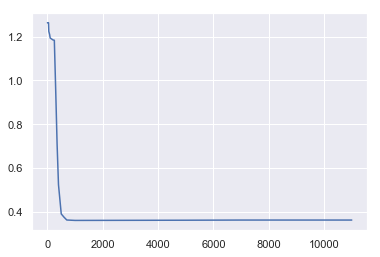

In [85]:
rmse_lasso = temp.apply(lambda x:np.sqrt(sum(x)),axis=1 )
rmse_lasso
sns.lineplot(x=rmse_lasso.index, y=rmse_lasso.values)
#plt.xlim(300,520)

In [86]:
lasso_pred = np.expm1(model_lasso.predict(X_test))

### Ridge CV

In [87]:
alphas_alt = [7, 7.1, 7.2, 7,3, 7.5, 7.7,7.8, 7.9, 8, 8.1, 8.2, 8.3, 8.4, 8.5,9,10]
#alphas_alt = [.001, .005, .01, .05, .1, .2, 1, 2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 50, 80, 100, 200]

model_ridge = RidgeCV(alphas = alphas_alt, cv=None,store_cv_values=True ).fit(X_train, y_train)
model_ridge.alpha_

8.1

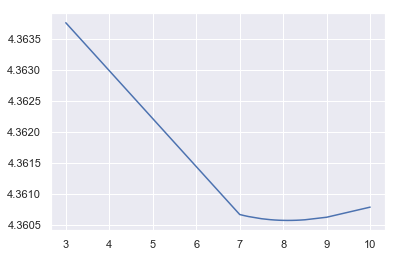

In [88]:
temp = pd.DataFrame(model_ridge.cv_values_, columns = alphas_alt)
rmse_ridge = temp.apply(lambda x:np.sqrt(sum(x)),axis=0 )
sns.lineplot(x=rmse_ridge.index, y=rmse_ridge.values)
# plt.xlim(7.7,8.5)

In [89]:
model_ridge = RidgeCV(alphas = [500], cv=None,store_cv_values=True ).fit(X_train, y_train)

In [90]:

ridge_pred = np.expm1(model_ridge.predict(X_test))

In [91]:
# pred = lasso_pred*.4 + ridge_pred*.6
pred = lasso_pred*.7 + ridge_pred*.3

In [92]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice':pred})

In [93]:
results.to_csv('20191112_ridge_lasso_v7.csv', index=False)

In [94]:
x = pd.read_csv('20191112_ridge_lasso_v7.csv')
x.head()

,Id,SalePrice
0,1461,116325.265180
1,1462,156516.528633
2,1463,180254.610922
3,1464,198258.399629
4,1465,196675.038445


### XGB

In [16]:
import time

In [79]:
reg_lambda = [0.0001,0.0005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
reg_alpha = [0.0001,0.0005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

In [17]:
start_time = time.time()

model_xgb = XGB(n_jobs=-1)
rmse = cv_rmse(model_xgb)

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Volted User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Volted User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Volted User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Volted User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Volted User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 1.4283185005187988 seconds ---


In [100]:
rmse.mean()

0.21441346940892672

In [18]:
model_xgb.fit(X_train, y_train)

[10:59:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Volted User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [19]:
xgb_pred = np.expm1(model_xgb.predict(X_test))

In [20]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice':xgb_pred})

In [21]:
results.head()

,Id,SalePrice
0,1461,125653.703125
1,1462,160502.281250
2,1463,176739.109375
3,1464,188878.718750
4,1465,197526.875000


In [22]:
results.to_csv('20191112_xgb_v1.csv', index=False)

In [33]:
stack_gen = StackingCVRegressor(regressors=(model_ridge, model_lasso,model_xgb), 
                               meta_regressor=model_lasso,
                               use_features_in_secondary=True)

In [34]:
stack_gen.fit(X_train, y_train)

[11:10:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:11:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
          meta_regressor=LassoCV(alphas=[1e-15, 1e-13, 1e-10, 1e-07, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 1, 2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 50, 80, 100, 200, 250, 300, 350, 400, 500, 600, 700, 1000, 5000, 7000, 9000, 11000],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000000,
    n_alphas=100, n_jobs=-1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
          n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
          refit=True,
          regressors=(RidgeCV(alphas=array([ 7. ,  7.1,  7.2,  7. ,  3. ,  7.5,  7.7,  7.8,  7.9,  8. ,  8.1,
        8.2,  8.3,  8.4,  8.5,  9. , 10. ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True), LassoCV(alphas=[1e-15, 1e-13, 1e-10, 1e-07, 0.000...alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)),
   

In [37]:
stacked_pred = np.expm1(stack_gen.predict(X_test.values))

In [38]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice':stacked_pred})

In [39]:
results.head()

,Id,SalePrice
0,1461,115337.185417
1,1462,165841.494678
2,1463,180112.615290
3,1464,197746.482694
4,1465,198648.467458


In [40]:
results.to_csv('20191112_stacked_v3.csv', index=False)

In [92]:
# scores = []
# for alpha in reg_alpha:
#     for lamb in reg_lambda:
#         model_xgb = XGB(n_jobs=-1,reg_alpha=alpha, reg_lambda=lamb)
#         rmse = cv_rmse(model_xgb)
#         scores.append(rmse.mean())
        

In [ ]:
xgb_fit = xgb_model.fit(X_train, y_train)

### Ridge

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

ridge_model = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=5)).fit(X_train, y_train)

### Lasso

alphas = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas,
                                    random_state = 42)).fit(X_train, y_train)

### ElasticNet

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=5, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(X_train, y_train)

### XGB

xgb_model = XGB(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006, n_jobs=-1)

xgb_fit = xgb_model.fit(X_train, y_train)

from sklearn import svm
svr_opt = svm.SVR(C = 100000, gamma = 1e-08)

svr_fit = svr_opt.fit(X_train, y_train)

from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgbm_fit = lgbm_model.fit(X_train, y_train)

kfolds = 6
ridge = make_pipeline(RobustScaler(), 
                      RidgeCV(alphas = alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = alphas,
                              random_state = 42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

lightgbm = make_pipeline(RobustScaler(),
                        LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=720,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.2319,
                                      feature_fraction_seed=9, bagging_seed=9,
                                      min_data_in_leaf =6, 
                                      min_sum_hessian_in_leaf = 11))

xgboost = make_pipeline(RobustScaler(),
                        XGB(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:linear',
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006, n_jobs=-1))


#stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, 
                                            xgboost, lightgbm), 
                               meta_regressor=xgboost,
                               use_features_in_secondary=True)

stackX = np.array(X_train)
stacky = np.array(y_train)

stack_gen_model = stack_gen.fit(stackX, stacky)

ridge_pred = ridge_model.predict(test[features])
lasso_pred = lasso_model2.predict(test[features])
enet_pred = elastic_model3.predict(test[features])
xgb_pred = xgb_fit.predict(test[features])
svr_pred = svr_fit.predict(test[features])
lgb_pred = lgbm_fit.predict(test[features])
stack_pred = stack_gen_model.predict(test[features])

stack_preds = ((0.1*enet_pred) + (0.15*lasso_pred) + (0.15*ridge_pred) + 
               (0.2*xgb_pred) + (0.1*lgb_pred) + (0.3*stack_pred))

stack_preds

pred = np.expm1(stack_preds)

results = pd.DataFrame({'Id':test['Id'], 'SalePrice':pred})

results.to_csv('20191106_v2.csv', index=False)